# Assignment 4 - Control Theory (Artem Bakhanov)
I have variant A and I used "Artem" as my name and "a.bahanov@innopolis.university" as my email for obtaining the variant.<br/>
I am very lazy and I used Python for all the symbolic calculations (I love SymPy library).

## Initial setup
Here I create symbolic variables I will work with.

In [1]:
import sympy as sp
import numpy as np

# x and its first and second derivatives
x = sp.Symbol("x")
x_ = sp.Symbol("x'")
x__ = sp.Symbol("x''")

# theta and its first and second derivatives
theta = sp.Symbol("theta")
theta_ = sp.Symbol("\\theta^\prime")
theta__ = sp.Symbol("\\theta^{\prime\prime}")

# other parameters
m = sp.Symbol("m")
M = sp.Symbol("M")
l = sp.Symbol("l")
F = sp.Symbol("F")
g = sp.Symbol("g")

## Task A
In this task I found matrices $M(q)$, $n(q, \dot{q})$ and $B$. 
$$
M = \begin{pmatrix}
M + m & -lm\cos(\theta)\\
-\cos(\theta) & l
\end{pmatrix}
= \begin{pmatrix}
8.5 & -3.68 \cos(\theta)\\
-\cos(\theta) & 1.15
\end{pmatrix}
$$
$$
n = \begin{pmatrix}
lm \cdot (\theta ')^2 \sin(\theta)\\
-g\sin(\theta)
\end{pmatrix} = 
\begin{pmatrix}
3.68 \cdot (\theta ')^2 \sin(\theta) \\
-g\sin(\theta)
\end{pmatrix}
$$
$$
B = \begin{pmatrix}
1\\
0
\end{pmatrix}
$$

In [2]:
M_ = sp.Matrix([[M + m, -m * l * sp.cos(theta)], [-sp.cos(theta), l]])
n_ = sp.Matrix([[m * l * sp.sin(theta) * theta_ ** 2], [-g * sp.sin(theta)]])
B_ = sp.Matrix([[1], [0]])

## Task B
Since I am very lazy to calculate everything by hand I found the inverse of M. Since f and g are just vectors (actually vector functions but anyway), the first two elements of f are simply $x$ and $\theta$ and ones of g are 0s. The problem is with finding the last two elements. Let us use the result of task A.
$$
M(q)\ddot{q} + n(q, \dot{q}) = Bu
$$
$$
M(q)\ddot{q} = - n(q, \dot{q}) + Bu
$$
$$
\ddot{q} = M(q)^{-1}(- n(q, \dot{q}) + Bu)
$$where $q = \begin{bmatrix} x & \theta\end{bmatrix}^T$. 
Since $\ddot{q}$ is what we are trying to find, $-M(q)^{-1} n(q, \dot{q})$ and $M(q)^{-1}B$ are the last elements of $f$ and $g$ respectively.
So the final answer:
$$
f(z) = \left[\begin{matrix}x'\\\theta^\prime\\\frac{m \left(g \cos{\left(\theta \right)} - l (\theta ')^{2}\right) \sin{\left(\theta \right)}}{M + m \sin^{2}{\left(\theta \right)}}\\\frac{\left(g \left(M + m\right) - l m (\theta ')^{2} \cos{\left(\theta \right)}\right) \sin{\left(\theta \right)}}{l \left(M + m \sin^{2}{\left(\theta \right)}\right)}\end{matrix}\right] = \left[\begin{matrix}x'\\\theta^\prime\\\frac{3.2 \left(g \cos{\left(\theta \right)} - 1.15 (\theta ')^{2}\right) \sin{\left(\theta \right)}}{3.2 \sin^{2}{\left(\theta \right)} + 5.3}\\\frac{0.87 \left(8.5 g - 3.68 (\theta ')^{2} \cos{\left(\theta \right)}\right) \sin{\left(\theta \right)}}{3.2 \sin^{2}{\left(\theta \right)} + 5.3}\end{matrix}\right]
$$

$$
g(z) = \left[\begin{matrix}0\\0\\\frac{1}{M + m \sin^{2}{\left(\theta \right)}}\\\frac{\cos{\left(\theta \right)}}{l \left(M + m \sin^{2}{\left(\theta \right)}\right)}\end{matrix}\right] = \left[\begin{matrix}0\\0\\\frac{1}{3.2 \sin^{2}{\left(\theta \right)} + 5.3}\\\frac{0.87 \cos{\left(\theta \right)}}{3.2 \sin^{2}{\left(\theta \right)} + 5.3}\end{matrix}\right]
$$

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
subs = dict(zip([m, M, l], [3.2, 5.3, 1.15]))

# find M inverse
M_inv = sp.simplify(M_.inv())
M_inv

Matrix([
[             1/(M + m*sin(theta)**2), m*cos(theta)/(M + m*sin(theta)**2)],
[cos(theta)/(l*(M + m*sin(theta)**2)),  (M + m)/(l*(M + m*sin(theta)**2))]])

In [4]:
f_2 = sp.simplify(-M_inv * n_)  # the last two elements of f
g_2 = sp.simplify(M_inv * B_)  # the last two elements of g

# f and g
f_ = sp.simplify(sp.Matrix([[x_], [theta_], [f_2[0]], [f_2[1]]]))
g_ = sp.simplify(sp.Matrix([[0], [0], [g_2[0]], [g_2[1]]]))

# printing f and g out
f_
g_

Matrix([
[                                                                                 x'],
[                                                                      \theta^\prime],
[            m*(-\theta^\prime**2*l + g*cos(theta))*sin(theta)/(M + m*sin(theta)**2)],
[-(\theta^\prime**2*l*m*cos(theta) - g*(M + m))*sin(theta)/(l*(M + m*sin(theta)**2))]])

Matrix([
[                                   0],
[                                   0],
[             1/(M + m*sin(theta)**2)],
[cos(theta)/(l*(M + m*sin(theta)**2))]])

## Task C
Linearazation was made automatically again.
$$
A = \left[\begin{matrix}0 & 0 & 1 & 0\\0 & 0 & 0 & 1\\0 & \frac{g m}{M} & 0 & 0\\0 & \frac{g \left(M + m\right)}{M l} & 0 & 0\end{matrix}\right] = \left[\begin{matrix}0 & 0 & 1 & 0\\0 & 0 & 0 & 1\\0 & 5.92 & 0 & 0\\0 & 13.68 & 0 & 0\end{matrix}\right]
$$

$$
B = \left[\begin{matrix}0\\0\\\frac{1}{M}\\\frac{1}{M l}\end{matrix}\right] = \left[\begin{matrix}0\\0\\0.19\\0.16\end{matrix}\right]
$$

In [5]:
# states
states = [x, theta, x_, theta_]

# input
inputs = [F]

# matrices Ad and Bd
# here I create a Jacobian matrix. 
# Each line is a partial derivative of f_i (f) 
Ad = sp.Matrix([[sp.diff(f, x) for x in states] for f in f_])

# Bd is simply g since it is already multiplied by u. There is no need to calculate Jacobian.
Bd = g_

# dict of subtitutions for desired states
desired_states = dict(zip([x, theta, x_, theta_], [0, 0, 0, 0]))

# all substitutions (check variant A)
subs = dict(zip([m, M, l, g], [3.2, 5.3, 1.15, 9.81]))

# matrix A and B (without parameters substituting)
Ad.subs(desired_states)
Bd.subs(desired_states)

Matrix([
[0,               0, 1, 0],
[0,               0, 0, 1],
[0,           g*m/M, 0, 0],
[0, g*(M + m)/(M*l), 0, 0]])

Matrix([
[      0],
[      0],
[    1/M],
[1/(M*l)]])

In [6]:
# final matrices with substituted numbers

A_ = Ad.subs(subs).subs(desired_states)
B_ = Bd.subs(subs).subs(desired_states)
A = np.array(A_.tolist()).astype(np.float64)
B = np.array(B_.tolist()).astype(np.float64)
A_
B_

Matrix([
[0,                0, 1, 0],
[0,                0, 0, 1],
[0, 5.92301886792453, 0, 0],
[0, 13.6808859721083, 0, 0]])

Matrix([
[                0],
[                0],
[0.188679245283019],
[0.164068908941756]])

## Task D
Here I use test presented on the lab. The system is controllable if 
$
rank([B \ AB \ ... \ A^{n-1}B)]) = n
$.<br/>
In our case n = 4. Let us verify it.

In [7]:
assert(np.linalg.matrix_rank(np.block([[B, A.dot(B), A.dot(A).dot(B), A.dot(A).dot(A).dot(B)]])) == 4)

No exception! It means that the system is controllable.

## Task E
Calculating the eigen values of the linearized system.

In [8]:
np.linalg.eig(A)[0]

array([ 0.        ,  0.        ,  3.69876817, -3.69876817])

The system is not stable since there is one eigen value with positive real part.

## Task F
For this task I used SciPy library with module signal.

In [9]:
from scipy.signal import place_poles
import matplotlib.pyplot as plt
from scipy.integrate import *
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'last'

def stepinfo(t,yout):
    print(f"Overshoot: {(yout.max() - yout[-1])}")
    print(f"Rise Time: {t[([0] + [i for i in range(0, len(yout)-1) if yout[i]>yout[-1] * .90])[-1]]-t[0]}")
    print(f"Settling Time: {t[next(len(yout)-i for i in range(2,len(yout)-1) if abs(yout[-i]/yout[-1])>1.02)]-t[0]}")
    
def subplot(pos, t, res):
    plt.subplot(pos)
    res = res.T
    for i in range(len(res)):
        plt.plot(t, res[i], label="test")

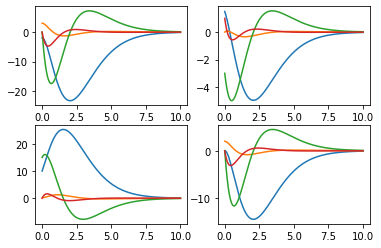

In [10]:
K = place_poles(A, B, [-1, -1.2, -1.3, -1.4]).gain_matrix 
A_cl = A - B.dot(K)
np.linalg.eig(A_cl)[0]

t = np.linspace(0, 10, 1000)

def df(x, t):
    x = np.array(x).reshape(4, 1)
    return list(np.matmul(A_cl, x).T[0])
res1 = odeint(df, [-2, 3, 0, 0], t)
res2 = odeint(df, [1.5, 0, -3, 1], t)
res3 = odeint(df, [10, 0.2, 15, 0], t)
res4 = odeint(df, [0, 2, 0, 0], t)

subplot(221, t, res1)
subplot(222, t, res2)
subplot(223, t, res3)
subplot(224, t, res4)
plt.show()

As you can see, the system goes well to the desired position $(0, 0, 0, 0)^T$

In [11]:
stepinfo(t, res1.T[0])
stepinfo(t, res1.T[1])
print("Res 2:")
stepinfo(t, res2.T[0])
stepinfo(t, res2.T[1])

Overshoot: 0.0
Rise Time: 0.0
Settling Time: 9.96996996996997
Overshoot: 2.989736475204101
Rise Time: 9.98998998998999
Settling Time: 9.96996996996997
Res 2:
Overshoot: 1.5261776450246798
Rise Time: 0.36036036036036034
Settling Time: 9.96996996996997
Overshoot: 0.07791883665628939
Rise Time: 9.98998998998999
Settling Time: 9.96996996996997


## Task G
For this task I designed an LQR controller. The matrices Q and R were adjusted by hand.
In this task I can tell that it the system stabilizes much faster and better (look below).

In [12]:
from control import *
from scipy.signal import place_poles
import matplotlib.pyplot as plt
from scipy.integrate import *
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'last'
from math import *

def subplot(pos, t, res):
    plt.subplot(pos)
    res = res.T
    for i in range(len(res)):
        plt.plot(t, res[i], label="test")

[[-15.8113883  328.85784213 -32.26899057 101.27906058]]
Eig: [-4.70013752+0.j         -3.36443707+0.j         -1.23184079+0.30313026j
 -1.23184079-0.30313026j]


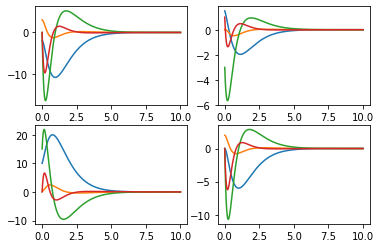

In [13]:
R = np.array([
    [25, 0, 0, 0],
    [0, 0.0003, 0, 0],
    [0, 0, 25, 0],
    [0, 0, 0, 0.0003]
])
Q = np.array([[0.1]])
K, S, E = lqr(A, B, R, Q)
K = np.array(K)
print(K)

A_cl = A - B.dot(K)
print(f"Eig: {np.linalg.eig(A_cl)[0]}")

t = np.linspace(0, 10, 1000)

def df(x, t):
    x = np.array(x).reshape(4, 1)
    return list(np.matmul(A_cl, x).T[0])
res1 = odeint(df, [-2, 3, 0, 0], t)
res2 = odeint(df, [1.5, 0, -3, 1], t)
res3 = odeint(df, [10, 0.2, 15, 0], t)
res4 = odeint(df, [0, 2, 0, 0], t)

subplot(221, t, res1)
subplot(222, t, res2)
subplot(223, t, res3)
subplot(224, t, res4)
plt.show()

In [14]:
print("Res 1:")
stepinfo(t, res1.T[0])
stepinfo(t, res1.T[1])
print("Res 2:")
stepinfo(t, res2.T[0])
stepinfo(t, res2.T[1])

Res 1:
Overshoot: 0.0
Rise Time: 0.0
Settling Time: 9.98998998998999
Overshoot: 2.9999180579347073
Rise Time: 9.98998998998999
Settling Time: 9.97997997997998
Res 2:
Overshoot: 1.5000286375733218
Rise Time: 0.2902902902902903
Settling Time: 9.98998998998999
Overshoot: 0.03647336282589482
Rise Time: 9.98998998998999
Settling Time: 9.97997997997998


Here I compared these two methods on first two initial conditions: as you can see the second method (LQR controller) is much better since it has smaller overshoot and settling time.

In [16]:
sp.diff(g_, theta)

Matrix([
[                                                                                                0],
[                                                                                                0],
[                                              -2*m*sin(theta)*cos(theta)/(M + m*sin(theta)**2)**2],
[-2*m*sin(theta)*cos(theta)**2/(l*(M + m*sin(theta)**2)**2) - sin(theta)/(l*(M + m*sin(theta)**2))]])